###### pdbファイルからデータを取り出す

In [101]:
'''
pdbファイルの詳しい構成についての参考: 
    ftp://ftp.wwpdb.org/pub/pdb/doc/format_descriptions/Format_v33_A4.pdf 
    
取ってきたGFP
    http://www.rcsb.org/structure/1EMA 

Biopython参考 
    https://biopython.org/wiki/The_Biopython_Structural_Bioinformatics_FAQ 
'''

'\npdbファイルの詳しい構成についての参考: \n    ftp://ftp.wwpdb.org/pub/pdb/doc/format_descriptions/Format_v33_A4.pdf \n    \n取ってきたGFP\n    http://www.rcsb.org/structure/1EMA \n\nBiopython参考 \n    https://biopython.org/wiki/The_Biopython_Structural_Bioinformatics_FAQ \n'

In [130]:
'''
sheet構造のregister 
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3149256/  
    
helix構造のデータ取り出しコード参考  
    https://gist.github.com/alyxthal/1b2d64f7b7fbeb23d9a55acd88ed13ad  
'''

'\nsheet構造のregister \n    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3149256/  \n    \nhelix構造のデータ取り出しコード参考  \n    https://gist.github.com/alyxthal/1b2d64f7b7fbeb23d9a55acd88ed13ad  \n'

###### 取得データ
- HELIX → helices
- SHEET → sheets
- LINK → links
- ATOM (HETATM) → atom_chain, atom_xyz, atom_bf 
- CONECT → connects

In [132]:
# coding: UTF-8
import matplotlib
%matplotlib inline
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import math
from Bio.PDB import *
import numpy as np
from scipy.spatial.distance import cdist
from matplotlib.colors import LinearSegmentedColormap

In [133]:
def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

cmap = generate_cmap(["white", '#03A9F4', "orange", "red"])

In [134]:
file_dir = '/home/lab/igarashi/Downloads/'
# file_dir = '/Users/Risa/Downloads/'

###### .pdbのファイルからデータを取り出すとき、PDBParser モジュールを利用する。

In [135]:
# pdb_parser = MMCIFParser()
pdb_parser = PDBParser()
structure = pdb_parser.get_structure('X', f'{file_dir}/1ema.pdb') # 1: 決めた構造名, 2: ファイル名


In [136]:
def dist(a,b):
    return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2+(a[2]-b[2])**2)

with open(f'{file_dir}/1ema.pdb', 'r') as f:
    content = f.readlines()

# Helix構造
# 22-25: ヘリックス構造の最初の配列番号
# 34-37: ヘリックス構造の最後の配列番号
# 39-40: ヘリックスクラスの番号
helices = {}
i = 0
for line in content:
    if (line[:5] == "HELIX"):
        print(line)
        num_init = int(line[22:25])
        num_final = int(line[34:37])
        h_class = int(line[39:40])
        helices.update({i:{'num_init' :num_init, 'num_fin' :num_final, 'h_class' :h_class}})
        i += 1

# Sheet構造
# 23-26: シート構造の最初の配列番号
# 34-37: シート構造の最後の配列番号
# 38-40: シートの状態, 0: first strand, 1:平行, -1:逆平行
# 45-48: 現在のストランドの残基の名前?
# 60-63: 前のストランドの残基の名前?
sheets = {}
i = 0
for line in content:
    if (line[:5] == "SHEET"):
        print(line)
        num_init = int(line[23:26])
        num_final = int(line[34:37])
        state = float(line[38:40])
        name_current = line[45:48]
        name_pre = line[60:63]
        sheets.update({i:{'num_init' :num_init, 'num_fin' :num_final, 'state' :state, 'name_current' :name_current, 'name_pre' :name_pre}})
        i += 1
        
# link構造
# 23-26: atom1の配列番号
# 53-56: atom2の配列番号
# 74-78: リンクの長さ
links = {}
i = 0
for line in content:
    if (line[:4] == "LINK"):
        print(line)
        num_atom1 = int(line[23:26])
        num_atom2 = int(line[53:56])
        l_len = float(line[74:78])
        links.update({i:{'num_atom1':num_atom1, 'num_atom2' :num_atom2, 'l_len' :l_len}})
        i += 1
        
# connect
#    7-11: 対象とするatomの番号
# 12-16, 17-21, 22-26, 27-31: 結合するatomの番号
connects = {}
i = 0
for line in content:
    if (line[:6] == "CONECT"):
        print(line)
        num_atom0 = int(line[7:11])
        num_atom1 = int(line[12:16])
        if line[17:21]!='    ':
            num_atom2 = int(line[17:21])
        else:
            num_atom2 = None
        if line[22:26]!='    ':
            num_atom3 = int(line[22:26])
        else:
            num_atom3 = None
        if line[27:31]!='    ':
            num_atom4 = int(line[27:31])
        else:
            num_atom4 = None
        connects.update({i:{'num_atom0':num_atom0, 'num_atom1':num_atom1, 'num_atom2' :num_atom2, 'num_atom3':num_atom3, 'num_atom4':num_atom4}})
        i += 1

HELIX    1   1 GLY A    4  PHE A    8  5                                   5    

HELIX    2   2 TRP A   57  LEU A   60  1                                   4    

HELIX    3   3 GLN A   69  PHE A   71  5                                   3    

HELIX    4   4 PHE A   83  SER A   86  1                                   4    

SHEET    1   A11 GLY A 160  ASN A 170  0                                        

SHEET    2   A11 VAL A 176  PRO A 187 -1  N  ASN A 185   O  ILE A 161           

SHEET    3   A11 TYR A  92  PHE A 100 -1  N  PHE A  99   O  ASP A 180           

SHEET    4   A11 ASN A 105  GLU A 115 -1  N  VAL A 112   O  TYR A  92           

SHEET    5   A11 THR A 118  ILE A 128 -1  N  ILE A 128   O  ASN A 105           

SHEET    6   A11 VAL A  12  VAL A  22  1  N  LEU A  15   O  LEU A 119           

SHEET    7   A11 HIS A  25  ASP A  36 -1  N  GLY A  35   O  VAL A  12           

SHEET    8   A11 LYS A  41  CYS A  48 -1  N  ILE A  47   O  SER A  30           

SHEET    9   A11

In [137]:
content

['HEADER    FLUORESCENT PROTEIN                     01-AUG-96   1EMA              \n',
 'TITLE     GREEN FLUORESCENT PROTEIN FROM AEQUOREA VICTORIA                      \n',
 'COMPND    MOL_ID: 1;                                                            \n',
 'COMPND   2 MOLECULE: GREEN FLUORESCENT PROTEIN;                                 \n',
 'COMPND   3 CHAIN: A;                                                            \n',
 'COMPND   4 ENGINEERED: YES;                                                     \n',
 'COMPND   5 MUTATION: YES;                                                       \n',
 'COMPND   6 OTHER_DETAILS: THE PROTEIN CONTAINS SIX SE-METHIONINES. OF           \n',
 'COMPND   7 THESE, THE N-TERMINAL MET AND MET 233 ARE NOT PRESENT IN             \n',
 'COMPND   8 THE ENTRY                                                            \n',
 'SOURCE    MOL_ID: 1;                                                            \n',
 'SOURCE   2 ORGANISM_SCIENTIFIC: AEQUOREA 

In [138]:
helices

{0: {'h_class': 5, 'num_fin': 8, 'num_init': 4},
 1: {'h_class': 1, 'num_fin': 60, 'num_init': 57},
 2: {'h_class': 5, 'num_fin': 71, 'num_init': 69},
 3: {'h_class': 1, 'num_fin': 86, 'num_init': 83}}

In [139]:
sheets

{0: {'name_current': '   ',
  'name_pre': '   ',
  'num_fin': 170,
  'num_init': 160,
  'state': 0.0},
 1: {'name_current': 'ASN',
  'name_pre': 'ILE',
  'num_fin': 187,
  'num_init': 176,
  'state': -1.0},
 2: {'name_current': 'PHE',
  'name_pre': 'ASP',
  'num_fin': 100,
  'num_init': 92,
  'state': -1.0},
 3: {'name_current': 'VAL',
  'name_pre': 'TYR',
  'num_fin': 115,
  'num_init': 105,
  'state': -1.0},
 4: {'name_current': 'ILE',
  'name_pre': 'ASN',
  'num_fin': 128,
  'num_init': 118,
  'state': -1.0},
 5: {'name_current': 'LEU',
  'name_pre': 'LEU',
  'num_fin': 22,
  'num_init': 12,
  'state': 1.0},
 6: {'name_current': 'GLY',
  'name_pre': 'VAL',
  'num_fin': 36,
  'num_init': 25,
  'state': -1.0},
 7: {'name_current': 'ILE',
  'name_pre': 'SER',
  'num_fin': 48,
  'num_init': 41,
  'state': -1.0},
 8: {'name_current': 'GLU',
  'name_pre': 'LEU',
  'num_fin': 227,
  'num_init': 220,
  'state': -1.0},
 9: {'name_current': 'ALA',
  'name_pre': 'LEU',
  'num_fin': 207,
  'num

In [140]:
links

{0: {'l_len': 1.33, 'num_atom1': 66, 'num_atom2': 64},
 1: {'l_len': 1.33, 'num_atom1': 66, 'num_atom2': 68},
 2: {'l_len': 1.31, 'num_atom1': 78, 'num_atom2': 77},
 3: {'l_len': 1.32, 'num_atom1': 78, 'num_atom2': 79},
 4: {'l_len': 1.34, 'num_atom1': 88, 'num_atom2': 87},
 5: {'l_len': 1.34, 'num_atom1': 88, 'num_atom2': 89},
 6: {'l_len': 1.32, 'num_atom1': 153, 'num_atom2': 152},
 7: {'l_len': 1.33, 'num_atom1': 153, 'num_atom2': 154},
 8: {'l_len': 1.32, 'num_atom1': 218, 'num_atom2': 217},
 9: {'l_len': 1.34, 'num_atom1': 218, 'num_atom2': 219}}

In [141]:
connects

{0: {'num_atom0': 457,
  'num_atom1': 466,
  'num_atom2': None,
  'num_atom3': None,
  'num_atom4': None},
 1: {'num_atom0': 466,
  'num_atom1': 457,
  'num_atom2': 467,
  'num_atom3': None,
  'num_atom4': None},
 2: {'num_atom0': 467,
  'num_atom1': 466,
  'num_atom2': 468,
  'num_atom3': 471,
  'num_atom4': None},
 3: {'num_atom0': 468,
  'num_atom1': 467,
  'num_atom2': 469,
  'num_atom3': 470,
  'num_atom4': None},
 4: {'num_atom0': 469,
  'num_atom1': 468,
  'num_atom2': None,
  'num_atom3': None,
  'num_atom4': None},
 5: {'num_atom0': 470,
  'num_atom1': 468,
  'num_atom2': None,
  'num_atom3': None,
  'num_atom4': None},
 6: {'num_atom0': 471,
  'num_atom1': 467,
  'num_atom2': 472,
  'num_atom3': 473,
  'num_atom4': None},
 7: {'num_atom0': 472,
  'num_atom1': 471,
  'num_atom2': 476,
  'num_atom3': None,
  'num_atom4': None},
 8: {'num_atom0': 473,
  'num_atom1': 471,
  'num_atom2': 474,
  'num_atom3': 477,
  'num_atom4': None},
 9: {'num_atom0': 474,
  'num_atom1': 473,
  'n

In [142]:
# 残基は5' →　3'の向き

atom_chain = []
atom_xyz = []
atom_xyz_dict = {}
atom_bf = [] # 温度因子(b factor)

for model in structure.get_list():
    for chain in model.get_list():
        
        for residue in chain.get_list():
            # print(residue)
            for atom in residue.get_list():
                atom_name = atom.get_name()
                atom_chain.append(atom_name) # atomとheatatm1つずつ
                
                atom_xyz.append(atom.get_coord().tolist())
                
                atom_xyz_dict.update({atom_name:(atom.get_coord())}) # x, y, z座標
                
                atom_bf.append(atom.bfactor)
                # print(atom.get_occupancy()) # 占有率
atom_xyz = np.array(atom_xyz)

In [143]:
atom_chain

['N',
 'CA',
 'C',
 'O',
 'CB',
 'OG',
 'N',
 'CA',
 'C',
 'O',
 'CB',
 'CG',
 'CD',
 'CE',
 'NZ',
 'N',
 'CA',
 'C',
 'O',
 'N',
 'CA',
 'C',
 'O',
 'CB',
 'CG',
 'CD',
 'OE1',
 'OE2',
 'N',
 'CA',
 'C',
 'O',
 'CB',
 'CG',
 'N',
 'CA',
 'C',
 'O',
 'CB',
 'CG',
 'CD1',
 'CD2',
 'N',
 'CA',
 'C',
 'O',
 'CB',
 'CG',
 'CD1',
 'CD2',
 'CE1',
 'CE2',
 'CZ',
 'N',
 'CA',
 'C',
 'O',
 'CB',
 'OG1',
 'CG2',
 'N',
 'CA',
 'C',
 'O',
 'N',
 'CA',
 'C',
 'O',
 'CB',
 'CG1',
 'CG2',
 'N',
 'CA',
 'C',
 'O',
 'CB',
 'CG1',
 'CG2',
 'N',
 'CA',
 'C',
 'O',
 'CB',
 'CG',
 'CD',
 'N',
 'CA',
 'C',
 'O',
 'CB',
 'CG1',
 'CG2',
 'CD1',
 'N',
 'CA',
 'C',
 'O',
 'CB',
 'CG',
 'CD1',
 'CD2',
 'N',
 'CA',
 'C',
 'O',
 'CB',
 'CG1',
 'CG2',
 'N',
 'CA',
 'C',
 'O',
 'CB',
 'CG',
 'CD',
 'OE1',
 'OE2',
 'N',
 'CA',
 'C',
 'O',
 'CB',
 'CG',
 'CD1',
 'CD2',
 'N',
 'CA',
 'C',
 'O',
 'CB',
 'CG',
 'OD1',
 'OD2',
 'N',
 'CA',
 'C',
 'O',
 'N',
 'CA',
 'C',
 'O',
 'CB',
 'CG',
 'OD1',
 'OD2',
 'N',
 'CA',
 'C

In [144]:
atom_xyz 

array([[ 28.88800049,   9.4090004 ,  52.30099869],
       [ 27.63800049,  10.125     ,  52.51599884],
       [ 26.49900055,   9.63899994,  51.64400101],
       ..., 
       [ 19.6609993 ,  29.18099976,  51.53699875],
       [ 29.41200066,  17.50499916,  59.0890007 ],
       [ 27.23999977,  24.43700027,  38.94800186]])

In [145]:
atom_xyz.shape

(1866, 3)

In [146]:
atom_xyz_dict

{'C': array([ 44.01599884,  20.29100037,  50.63299942], dtype=float32),
 'C1': array([ 25.72999954,  27.1060009 ,  38.24499893], dtype=float32),
 'C2': array([ 26.04299927,  27.875     ,  40.36999893], dtype=float32),
 'C3': array([ 23.74500084,  25.32600021,  40.36000061], dtype=float32),
 'CA': array([ 43.00600052,  21.375     ,  50.9980011 ], dtype=float32),
 'CA1': array([ 25.01099968,  26.47800064,  37.07799911], dtype=float32),
 'CA2': array([ 27.1970005 ,  28.24500084,  39.51200104], dtype=float32),
 'CA3': array([ 23.91900063,  26.72100067,  39.84199905], dtype=float32),
 'CB': array([ 41.69100189,  20.77199936,  51.51900101], dtype=float32),
 'CB1': array([ 25.93099976,  26.03499985,  35.93000031], dtype=float32),
 'CB2': array([ 28.32900047,  28.8220005 ,  39.95999908], dtype=float32),
 'CD': array([ 29.89500046,  25.89100075,  34.93399811], dtype=float32),
 'CD1': array([ 39.38600159,  21.71500015,  52.09199905], dtype=float32),
 'CD2': array([ 35.75      ,  21.75      ,  31

In [147]:
atom_bf

[85.05,
 80.05,
 85.36,
 84.56,
 70.97,
 44.08,
 87.71,
 87.15,
 76.86,
 78.27,
 89.44,
 75.06,
 76.58,
 68.55,
 46.24,
 53.62,
 45.97,
 31.9,
 33.63,
 32.54,
 32.57,
 28.4,
 26.12,
 38.53,
 41.36,
 90.82,
 74.8,
 100.0,
 28.57,
 31.5,
 31.1,
 30.96,
 35.64,
 55.53,
 22.26,
 21.61,
 16.9,
 18.38,
 22.41,
 32.84,
 31.64,
 33.14,
 20.75,
 21.64,
 30.59,
 30.05,
 16.95,
 13.29,
 13.12,
 17.27,
 13.19,
 15.14,
 5.69,
 27.35,
 34.93,
 45.22,
 50.55,
 44.6,
 40.4,
 29.76,
 30.53,
 23.21,
 16.55,
 25.7,
 16.39,
 22.28,
 29.6,
 20.43,
 30.87,
 31.75,
 33.85,
 20.12,
 12.88,
 14.37,
 13.42,
 15.01,
 17.57,
 16.55,
 14.72,
 10.76,
 7.65,
 15.14,
 17.36,
 19.69,
 15.41,
 14.91,
 12.93,
 12.08,
 11.04,
 16.54,
 18.08,
 11.56,
 16.15,
 13.85,
 14.82,
 3.62,
 10.0,
 21.25,
 40.5,
 46.97,
 49.22,
 10.56,
 10.23,
 9.47,
 16.72,
 12.85,
 12.58,
 14.24,
 14.43,
 13.61,
 9.38,
 15.74,
 14.15,
 15.37,
 49.5,
 83.46,
 38.75,
 17.82,
 16.61,
 14.91,
 14.31,
 13.56,
 19.27,
 21.4,
 18.38,
 17.88,
 19.57,
 11

###### atom間の距離行列を計算する, ユークリッド距離

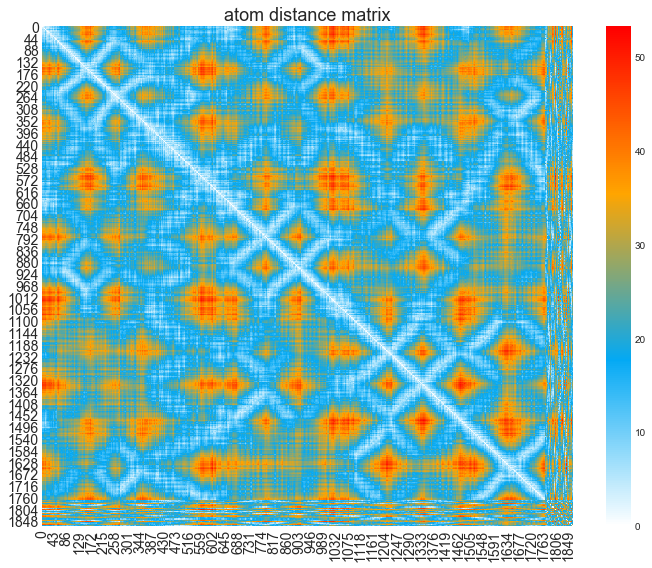

In [148]:
atom_dist = cdist(atom_xyz, atom_xyz) 

# 距離行列の可視化
plt.figure(figsize=(10, 8))
sns.heatmap(atom_dist, cmap=cmap)
plt.title('atom distance matrix', fontsize=18)
plt.tick_params(labelsize=14)
plt.tight_layout()
# plt.savefig(f'{}.png')
plt.show()
plt.close()    

###### アミノ酸同士の距離だからC間の距離?